In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet121, ResNet101, VGG16
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define paths
data_dir = '/content/drive/MyDrive/Project/Potatoes Diseases /Potatoes Diseases/potatoes Disease/My Project/potato_disease/traning/PlantVillage'

# Define the paths to save the models
model_paths = {
    'CNN_model_path': '/content/drive/MyDrive/Project/Potatoes Diseases /Potatoes Diseases/potatoes Disease/My Project/Saved_Models/CNN 2D',
    'DenseNet_model_path': '/content/drive/MyDrive/Project/Potatoes Diseases /Potatoes Diseases/potatoes Disease/My Project/Saved_Models/DenseNet121',
    'ResNet_model_path': '/content/drive/MyDrive/Project/Potatoes Diseases /Potatoes Diseases/potatoes Disease/My Project/Saved_Models/ResNet101',
    'VGG16_model_path': '/content/drive/MyDrive/Project/Potatoes Diseases /Potatoes Diseases/potatoes Disease/My Project/Saved_Models/VGG16'
}


In [ ]:
# Define the number of epochs
img_height, img_width = 150, 150
batch_size = 32
epochs = 40

In [ ]:
# Create ImageDataGenerators for preprocessing

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for one-hot encoded labels
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for one-hot encoded labels
    subset='validation'
)

# Check the classes detected
print(f"Classes in train_generator: {train_generator.class_indices}")
print(f"Classes in validation_generator: {validation_generator.class_indices}")

# Number of classes
num_classes = len(train_generator.class_indices)

# Define a function to create and compile models
def create_model(base_model, input_shape, num_classes):
    base_model.trainable = False  # Freeze the base model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(lr=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Found 1488 images belonging to 3 classes.
Found 370 images belonging to 3 classes.
Classes in train_generator: {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}
Classes in validation_generator: {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True
)

In [ ]:
# To Load the trained model run this cell
# if os.path.exists(CNN_model_path):
#     print("Loading the pre-trained model...")
#     model = keras.models.load_model(CNN_model_path)



models = {}

# Check if each model file exists and load it
for model_name, model_path in model_paths.items():
    if os.path.exists(model_path):
        print(f"Loading the pre-trained model: {model_name}")
        models[model_name] = load_model(model_path)
    else:
        print(f"Model file not found: {model_path}")

# Example: Accessing a specific loaded model
# model1 = models['model1']


Loading the pre-trained model: CNN_model_path
Loading the pre-trained model: DenseNet_model_path
Loading the pre-trained model: ResNet_model_path
Loading the pre-trained model: VGG16_model_path


In [ ]:
# checking specificaly model exists or not
import os

# Define the path to the model file
model_path = '/content/drive/MyDrive/Project/Potatoes Diseases /Potatoes Diseases/potatoes Disease/My Project/Saved_Models/CNN 2D/'

# Check if the model file exists
if os.path.exists(model_path):
    print(f"Model file exists: {model_path}")
else:
    print(f"Model file does not exist: {model_path}")


Model file exists: /content/drive/MyDrive/Project/Potatoes Diseases /Potatoes Diseases/potatoes Disease/My Project/Saved_Models/CNN 2D/


In [ ]:
num_classes = 3


# First Model: Simple CNN


model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model1.compile(optimizer=Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model1.summary()

# Assuming train_generator and validation_generator are defined
history1 = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=50

)

# Save the model
try:
    model1.save(model_paths['CNN_model_path'])
    print('CNN_model saved successfully')
except Exception as e:
    print(f'Error in saving CNN_model: {e}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        2

In [ ]:

# Second Model: DenseNet121 model

## Load the DenseNet121 model, pre-trained on ImageNet, without the top classification layer
base_model2 = DenseNet121(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
base_model2.trainable = False  # Freeze the base model

# Create the model
model2 = Sequential([
    base_model2,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Assuming num_classes is defined elsewhere as 3
])

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Display the model's architecture
model2.summary()

# Train the model
history2 = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

# Save the model
try:
    model2.save(model_paths['DenseNet_model_path'])
    print('DenseNet_model saved successfully')
except Exception as e:
    print(f'Error in saving DenseNet_model: {e}')

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 7563843 (28.85 MB)
Trainable params: 5263

In [ ]:
# Third Model: ResNet101

# Load the ResNet101 model, pre-trained on ImageNet, without the top classification layer
base_model3 = ResNet101(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
base_model3.trainable = False  # Freeze the base model

# Create the model
model3 = Sequential([
    base_model3,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Assuming num_classes is defined elsewhere as 3
])

# Compile the model
model3.compile(optimizer=Adam(lr=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Display the model's architecture
model3.summary()

# Train the model
history3 = model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

try:
    model3.save(model_paths['ResNet_model_path'])
    print('ResNet_model saved successfully')
except Exception as e:
    print(f'Error in saving ResNet_model: {e}')

171446536/171446536 [==============================] - 1s 0us/step


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 5, 5, 2048)        42658176  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 43708803 (166.74 MB)
Trainable params: 1050627 (4.01 MB)
Non-trainable params: 42658176 (162.73 MB)
______

In [ ]:
# Fourth Model: VGG16

# Load the VGG16 model, pre-trained on ImageNet, without the top classification layer
base_model4 = VGG16(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
base_model4.trainable = False  # Freeze the base model

# Create the model
model4 = Sequential([
    base_model4,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Assuming num_classes is defined elsewhere as 3
])

# Compile the model
model4.compile(optimizer=Adam(lr=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Display the model's architecture
model4.summary()

# Train the model
history4 = model4.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

# Save the model
try:
    model4.save(model_paths['VGG16_model_path'])
    print('VGG16_model saved successfully')
except Exception as e:
    print(f'Error in saving VGG16: {e}')

58889256/58889256 [==============================] - 0s 0us/step


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d_2  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 14978883 (57.14 MB)
Trainable params: 264195 (1.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________

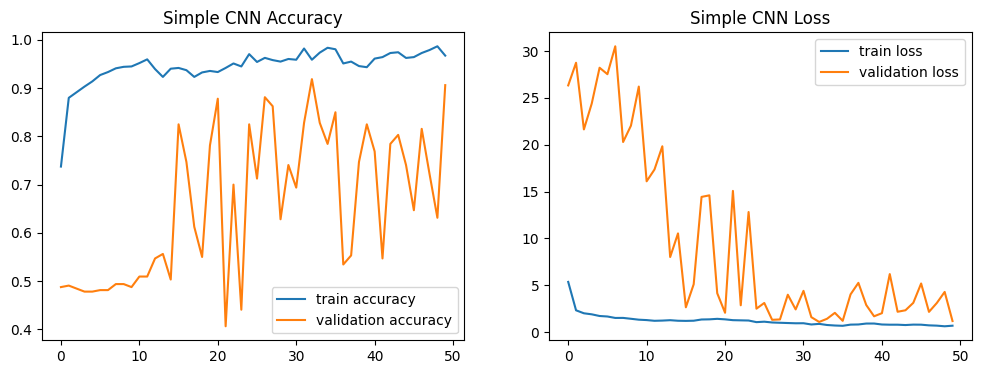

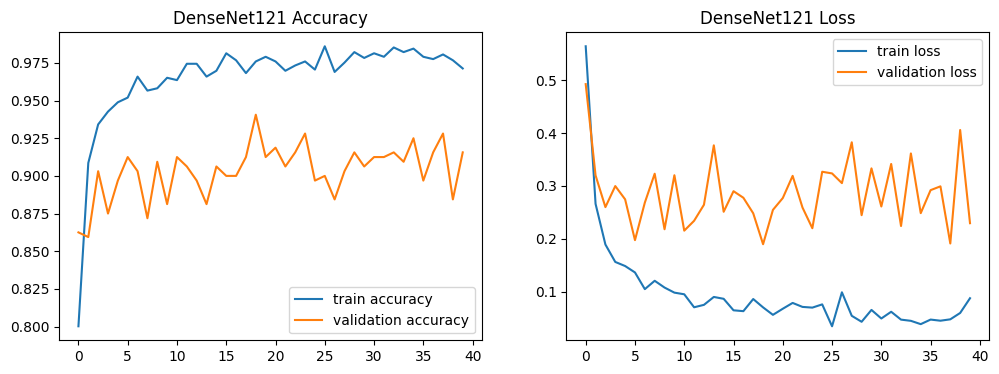

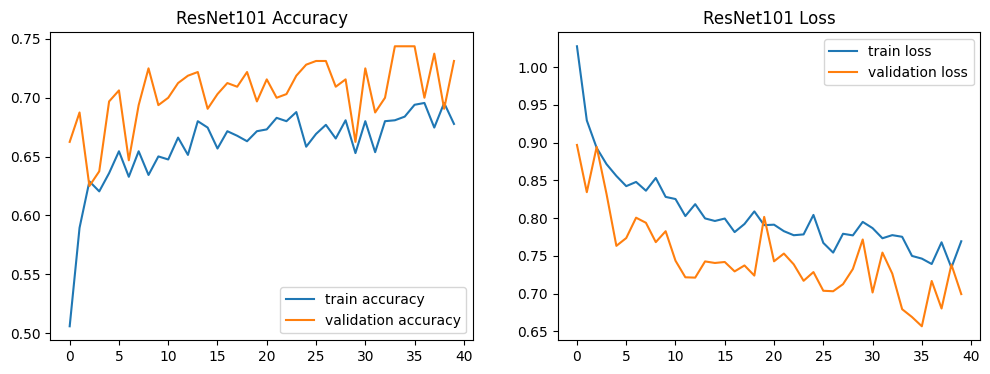

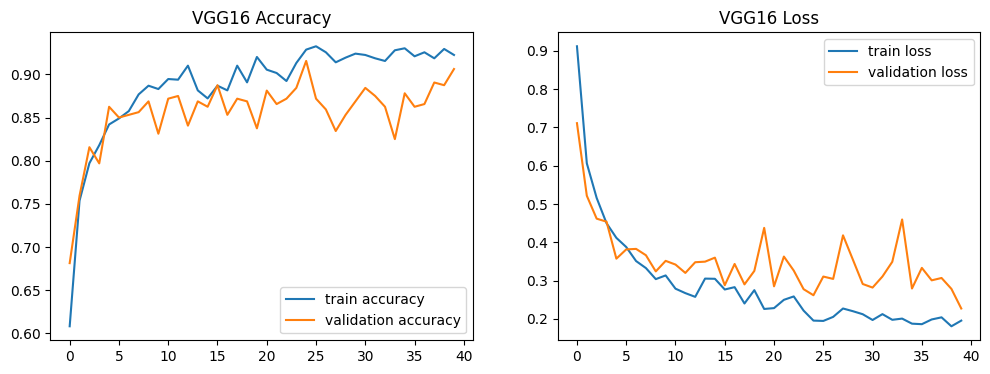

In [ ]:
# Plotting the training history
def plot_history(histories, titles):
    for history, title in zip(histories, titles):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='train accuracy')
        plt.plot(history.history['val_accuracy'], label='validation accuracy')
        plt.title(f'{title} Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='train loss')
        plt.plot(history.history['val_loss'], label='validation loss')
        plt.title(f'{title} Loss')
        plt.legend()

        plt.show()

histories = [history1, history2, history3, history4]
titles = ['Simple CNN', 'DenseNet121', 'ResNet101', 'VGG16']

plot_history(histories, titles)

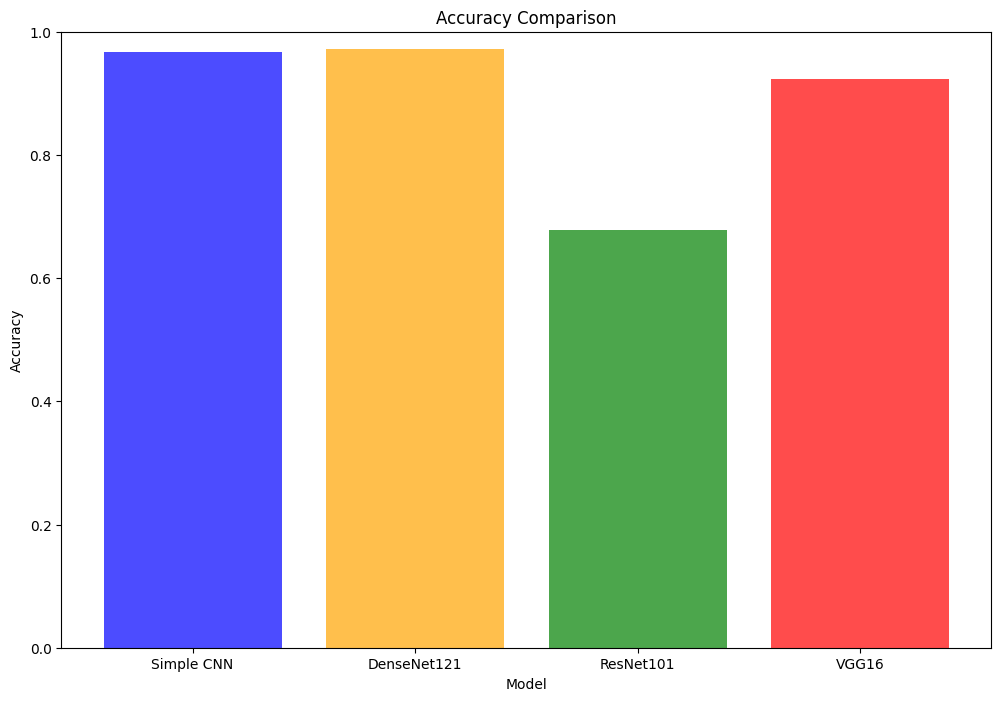

In [ ]:
def plot_comparison_bar_graph(metrics, titles, metric_name='Accuracy'):
    plt.figure(figsize=(12, 8))

    x = range(len(titles))
    plt.bar(x, metrics, color=['blue', 'orange', 'green', 'red'], alpha=0.7)

    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} Comparison')
    plt.xticks(x, titles)
    plt.ylim([0, 1])  # Adjust as needed for your metrics range
    plt.show()

# Example usage
# Assuming you have final accuracy metrics for each model
final_accuracies = [history1.history['accuracy'][-1], history2.history['accuracy'][-1], history3.history['accuracy'][-1], history4.history['accuracy'][-1]]
titles = ['Simple CNN', 'DenseNet121', 'ResNet101', 'VGG16']

plot_comparison_bar_graph(final_accuracies, titles, 'Accuracy')


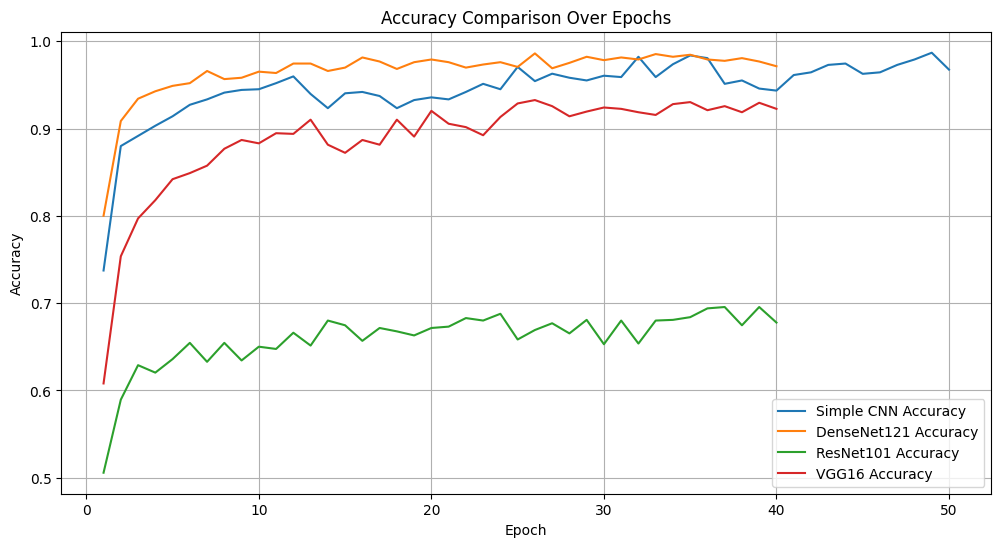

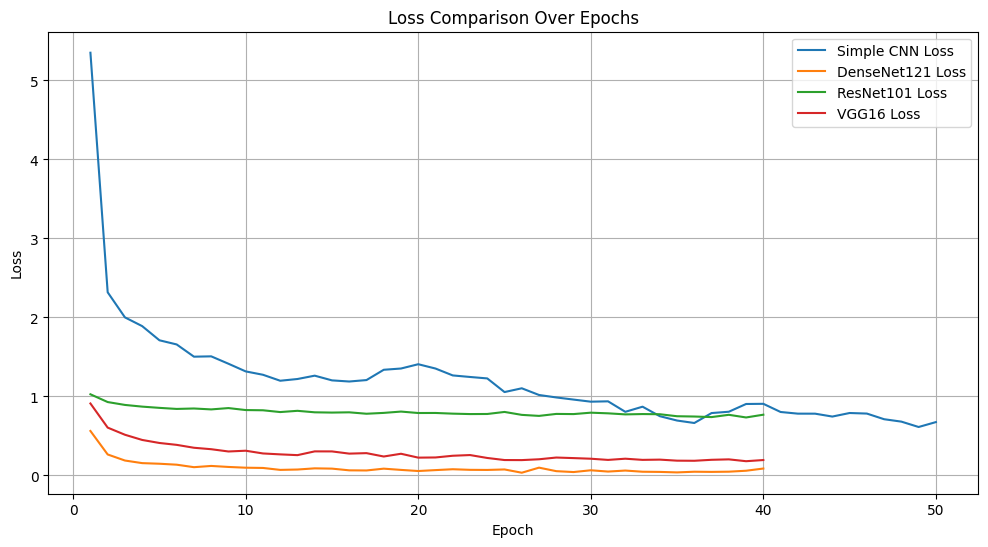

In [ ]:
def plot_comparison_line_graph(histories, titles, metric='accuracy'):
    plt.figure(figsize=(12, 6))

    for history, title in zip(histories, titles):
        epochs = range(1, len(history.history[metric]) + 1)
        plt.plot(epochs, history.history[metric], label=f'{title} {metric.capitalize()}')

    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} Comparison Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
histories = [history1, history2, history3, history4]
titles = ['Simple CNN', 'DenseNet121', 'ResNet101', 'VGG16']

plot_comparison_line_graph(histories, titles, 'accuracy')
plot_comparison_line_graph(histories, titles, 'loss')


1/1 [==============================] - 0s 159ms/step
Simple_CNN Prediction: Late Blight with confidence 1.00
1/1 [==============================] - 2s 2s/step
DenseNet121 Prediction: Late Blight with confidence 1.00


1/1 [==============================] - 3s 3s/step
ResNet101 Prediction: Early Blight with confidence 0.39
1/1 [==============================] - 1s 655ms/step
VGG16 Prediction: Late Blight with confidence 0.96
1/1 [==============================] - 0s 122ms/step

Simple_CNN Evaluation:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


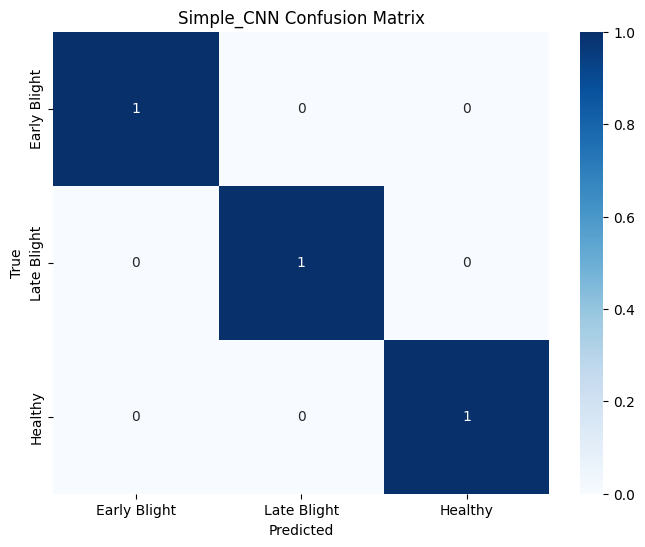

              precision    recall  f1-score   support

Early Blight       1.00      1.00      1.00         1
 Late Blight       1.00      1.00      1.00         1
     Healthy       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

1/1 [==============================] - 0s 337ms/step

DenseNet121 Evaluation:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


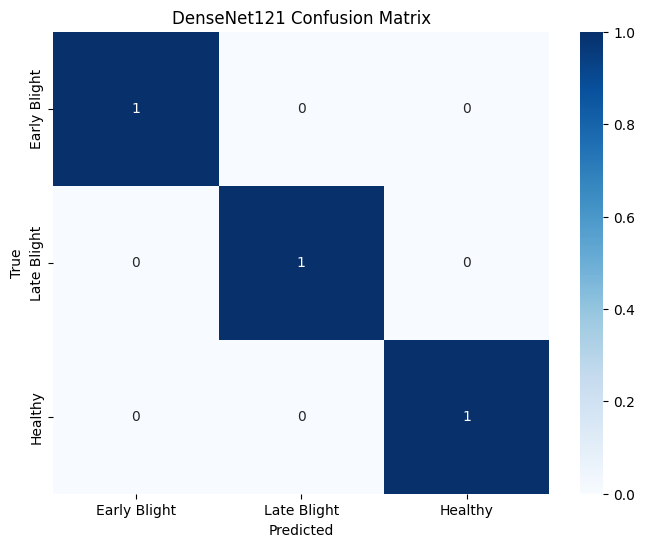

              precision    recall  f1-score   support

Early Blight       1.00      1.00      1.00         1
 Late Blight       1.00      1.00      1.00         1
     Healthy       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

1/1 [==============================] - 0s 451ms/step

ResNet101 Evaluation:
Accuracy: 0.33
Precision: 0.11
Recall: 0.33
F1 Score: 0.17


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


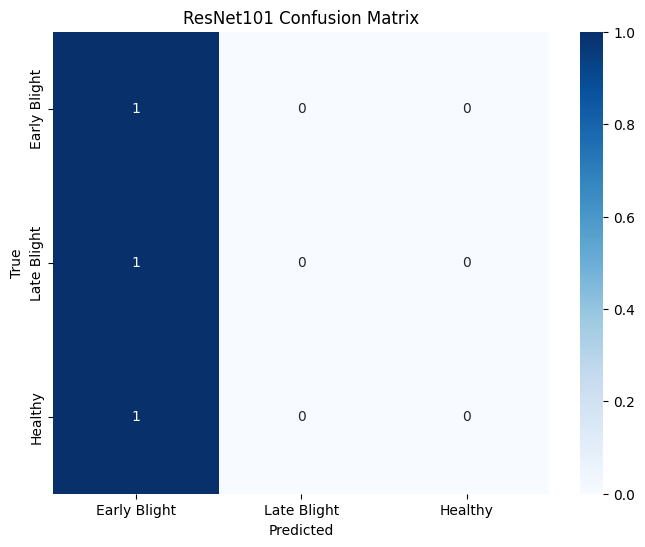

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

Early Blight       0.33      1.00      0.50         1
 Late Blight       0.00      0.00      0.00         1
     Healthy       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3

1/1 [==============================] - 1s 648ms/step

VGG16 Evaluation:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


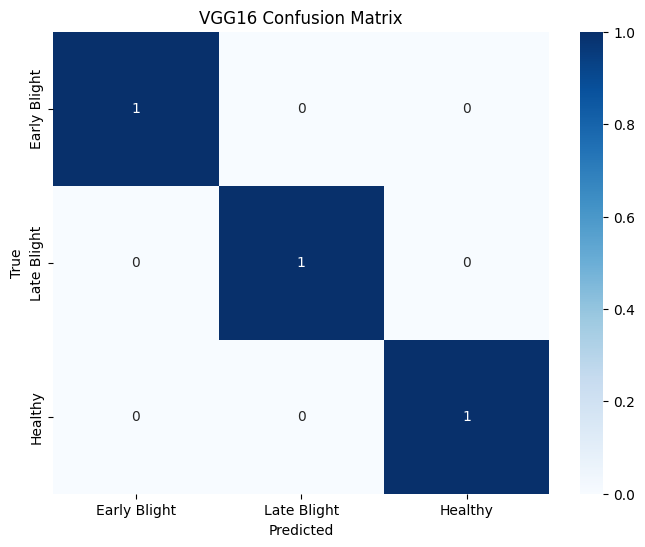

              precision    recall  f1-score   support

Early Blight       1.00      1.00      1.00         1
 Late Blight       1.00      1.00      1.00         1
     Healthy       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
# Define class labels
class_labels = ['Early Blight', 'Late Blight', 'Healthy']

# Define functions
def prepare_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

def predict_image(model, img_array):
    predictions = model.predict(img_array)
    return predictions

def get_prediction_label(predictions, class_labels):
    predicted_class = np.argmax(predictions, axis=1)[0]
    return class_labels[predicted_class], np.max(predictions)

def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Define the paths to saved models
model_paths = {
    'Simple_CNN': '/content/drive/MyDrive/Project/Potatoes Diseases /Potatoes Diseases/potatoes Disease/My Project/Saved_Models/CNN 2D',
    'DenseNet121': '/content/drive/MyDrive/Project/Potatoes Diseases /Potatoes Diseases/potatoes Disease/My Project/Saved_Models/DenseNet121',
    'ResNet101': '/content/drive/MyDrive/Project/Potatoes Diseases /Potatoes Diseases/potatoes Disease/My Project/Saved_Models/ResNet101',
    'VGG16': '/content/drive/MyDrive/Project/Potatoes Diseases /Potatoes Diseases/potatoes Disease/My Project/Saved_Models/VGG16'
}

# Load models
models = {name: load_model(path) for name, path in model_paths.items()}
model_names = list(models.keys())

# Example image path for prediction
img_path = '/content/drive/MyDrive/Project/Potatoes Diseases /Potatoes Diseases/potatoes Disease/My Project/Testing/Late blight leaf lesion.png'

# Prepare the image
img_array = prepare_image(img_path, (150, 150))

# Make predictions with each model
for name, model in models.items():
    predictions = predict_image(model, img_array)
    predicted_label, confidence = get_prediction_label(predictions, class_labels)
    print(f"{name} Prediction: {predicted_label} with confidence {confidence:.2f}")

# Evaluate models on a test dataset
# Replace these with actual paths and labels
test_image_paths = [
    '/content/drive/MyDrive/Project/Potatoes Diseases /Potatoes Diseases/potatoes Disease/My Project/Testing1/Potato___Early_blight/0d2e2971-f1c9-4278-b35c-91dd8a22a64d___RS_Early.B 7581 - Copy.JPG',
    '/content/drive/MyDrive/Project/Potatoes Diseases /Potatoes Diseases/potatoes Disease/My Project/Testing1/Potato___Late_blight/43dde1e0-8c73-45af-8fbf-d500e450a154___RS_LB 3270 - Copy - Copy.JPG',
    '//content/drive/MyDrive/Project/Potatoes Diseases /Potatoes Diseases/potatoes Disease/My Project/Testing1/Potato___healthy/923d4cc3-021a-4bcd-9f5f-1d6f69e4ad33___RS_HL 1888 - Copy - Copy - Copy.JPG'
]

test_labels = [0, 1, 2]  # Replace with actual test labels

# Prepare test images
X_test = np.vstack([prepare_image(img_path, (150, 150)) for img_path in test_image_paths])
y_test = np.array(test_labels)

for name, model in models.items():
    predictions = model.predict(X_test)
    predicted_labels = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(y_test, predicted_labels)
    precision = precision_score(y_test, predicted_labels, average='weighted')
    recall = recall_score(y_test, predicted_labels, average='weighted')
    f1 = f1_score(y_test, predicted_labels, average='weighted')

    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    cm = confusion_matrix(y_test, predicted_labels)
    plot_confusion_matrix(cm, class_labels, title=f'{name} Confusion Matrix')

    print(classification_report(y_test, predicted_labels, target_names=class_labels))


# New Section

## *App for testing images runtime *

In [ ]:
import io
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array

# Define the path to your model file
model_path = '/content/drive/MyDrive/Project/Potatoes Diseases /Potatoes Diseases/potatoes Disease/My Project/Saved_Models/CNN 2D'

# Load the trained model
model = keras.models.load_model(model_path)

# Define categories based on your model
disease_categories = ['Early Blight', 'Late Blight', 'Healthy']  # Replace with actual categories

# Function to preprocess image and make predictions
def predict_image(image):
    # Preprocess the image
    image_size = (150, 150)  # Adjust to match the model's input size
    image = image.resize(image_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0  # Normalize the image if needed

    # Make predictions
    predictions = model.predict(image)

    # Decode predictions and return the predicted category
    predicted_category_index = np.argmax(predictions)
    predicted_category = disease_categories[predicted_category_index]
    return predicted_category

# Define function to handle file upload
def on_file_upload(change):
    uploaded_file = file_uploader.value
    if uploaded_file:
        # Extract file content from the dictionary
        file_content = list(uploaded_file.values())[0]['content']

        # Set the value of the image_thumbnail widget to the file content
        image_thumbnail.value = file_content

        # Open the image for display
        image = Image.open(io.BytesIO(file_content))

        # Show progress bar
        progress_bar.value = 0
        for i in range(1, 101):
            progress_bar.value = i

        # Make prediction
        predicted_category = predict_image(image)
        label_prediction.value = f"<b>Predicted category:</b> {predicted_category}"

# Create file uploader widget
file_uploader = widgets.FileUpload(
    accept=".jpg,.jpeg,.png",
    description='Select Image',
    button_style='info',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%', margin='0 auto 20px auto')
)

# Bind file upload event to function
file_uploader.observe(on_file_upload, names='value')

# Create widgets for displaying image and prediction
image_thumbnail = widgets.Image(
    width=400, height=400,
    layout=widgets.Layout(margin='0 auto')
)
label_prediction = widgets.HTML(
    value="<b>Predicted category:</b>",
    layout=widgets.Layout(margin='20px auto 0 auto')
)

# Create progress bar widget
progress_bar = widgets.IntProgress(
    value=0,
    min=0,
    max=100,
    description='Processing:',
    bar_style='info',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%', margin='0 auto 20px auto')
)

# Display widgets
display(widgets.VBox([
    widgets.HTML("<h1 style='text-align:center'>Fruit Disease Detection</h1>"),
    widgets.HTML("<p style='text-align:center'>Upload an image of a Potatoe  and the app will predict if it has a disease.</p>"),
    file_uploader,
    image_thumbnail,
    progress_bar,
    label_prediction
], layout=widgets.Layout(align_items='center')))


1/1 [==============================] - 0s 465ms/step
